## Library and data imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score, mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve


In [2]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/miftahudinfaiz/RainfallPrediction/main/Rainfall.csv')


## Data preprocessing and data splitting

In [3]:
# Preprocessing steps (drop columns, handle missing values, etc.)

# Drop irrelecant data
data = data.drop(columns=['Stasiun','Tanggal'],

                 axis=1)
data = data.dropna(how='any')

# Split the data into features (X) and target variable (Y)
Y = data['Besok_hujan']
X = data.drop(columns=['Besok_hujan', 'Hari_hujan'])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)


## Defining classifiers

In [4]:
# Define the base classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
base_classifier_bagging = KNeighborsClassifier(n_neighbors=5)
base_classifier_boosting = DecisionTreeClassifier(max_depth=1)

# Define the ensemble bagging classifier
ensemble_model_bagging = BaggingClassifier(base_estimator=base_classifier_bagging, n_estimators=10, random_state=9)

# Define the ensemble boosting estimator
ensemble_model_boosting = AdaBoostClassifier(base_estimator=base_classifier_boosting, n_estimators=10, random_state=9)


## Training model

In [5]:
# Train KNN model
knn_classifier.fit(X_train, Y_train)

# Train ensemble bagging model
ensemble_model_bagging.fit(X_train, Y_train)

# Train ensemble boosting model
ensemble_model_boosting.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10, random_state=9)

## Classification

In [6]:
# Predict using knn model
Y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
confusion_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
classification_report_knn = classification_report(Y_test, Y_pred_knn)


In [7]:
# Calculate specificity
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix_knn.ravel()
specificity_knn = tn_knn / (tn_knn + fp_knn)

In [8]:
# Evaluate KNN model
print("KNN Classification Report:")
print(classification_report_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:")
print(confusion_matrix_knn)
print("KNN Specificity:", specificity_knn)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       205
           1       0.80      0.99      0.88        72

    accuracy                           0.93       277
   macro avg       0.90      0.95      0.92       277
weighted avg       0.94      0.93      0.93       277

KNN Accuracy: 0.9314079422382672
KNN Confusion Matrix:
[[187  18]
 [  1  71]]
KNN Specificity: 0.9121951219512195


In [9]:
# Average precision-recall score
average_precision_knn = average_precision_score(Y_test, Y_pred_knn)
print('Average precision-recall score: {0:0.2f}'.format(average_precision_knn))


Average precision-recall score: 0.79


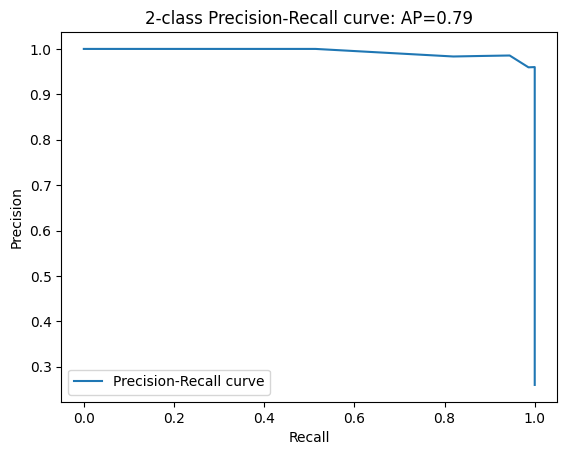

In [10]:
# Precision-Recall curve
precision_knn, recall_knn, _ = precision_recall_curve(Y_test, ensemble_model_boosting.predict_proba(X_test)[:, 1])

plt.plot(recall_knn, precision_knn, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_knn))
plt.legend(loc="lower left")
plt.show()


In [11]:
# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(Y_test, Y_pred_knn)
print("Mean Squared Error (MSE):", mse_knn)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(Y_test, Y_pred_knn)
print("Mean Absolute Error (MAE):", mae_knn)

# Calculate Area Under the ROC Curve (AUC)
auc_knn = roc_auc_score(Y_test, Y_pred_knn)
print("Area Under the ROC Curve (AUC):", auc_knn)


Mean Squared Error (MSE): 0.06859205776173286
Mean Absolute Error (MAE): 0.06859205776173286
Area Under the ROC Curve (AUC): 0.9491531165311654


In [12]:
# fpr, tpr, thresholds = roc_curve(xx, xx)
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plot_roc_curve(xxx, xxx)
# print(f'model 1 AUC score: {roc_auc_score(xxx, xxx)}')


In [13]:
# Predict using ensemble bagging model
Y_pred_ensemble_bagging = ensemble_model_bagging.predict(X_test)
accuracy_ensemble_bagging = accuracy_score(Y_test, Y_pred_ensemble_bagging)
confusion_matrix_ensemble_bagging = confusion_matrix(Y_test, Y_pred_ensemble_bagging)
classification_report_ensemble_bagging = classification_report(Y_test, Y_pred_ensemble_bagging)


In [14]:
# Calculate specificity
tn_ensemble_bagging, fp_ensemble_bagging, fn_ensemble_bagging, tp_ensemble_bagging = confusion_matrix_ensemble_bagging.ravel()
specificity_ensemble_bagging = tn_ensemble_bagging / (tn_ensemble_bagging + fp_ensemble_bagging)

In [15]:
# Evaluate ensemble bagging model
print("Ensemble Bagging Classification Report:")
print(classification_report_ensemble_bagging)
print("Ensemble Bagging Accuracy:", accuracy_ensemble_bagging)
print("Ensemble Bagging Confusion Matrix:")
print(confusion_matrix_ensemble_bagging)
print("KNN Specificity:", specificity_ensemble_bagging)


Ensemble Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       205
           1       0.82      0.99      0.89        72

    accuracy                           0.94       277
   macro avg       0.91      0.95      0.93       277
weighted avg       0.95      0.94      0.94       277

Ensemble Bagging Accuracy: 0.9386281588447654
Ensemble Bagging Confusion Matrix:
[[189  16]
 [  1  71]]
KNN Specificity: 0.9219512195121952


In [16]:
# Average precision-recall score
average_precision_ensemble_bagging = average_precision_score(Y_test, Y_pred_ensemble_bagging)
print('Average precision-recall score: {0:0.2f}'.format(average_precision_ensemble_bagging))


Average precision-recall score: 0.81


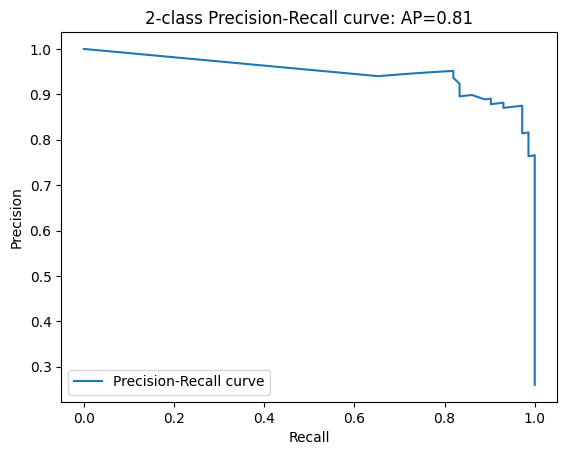

In [17]:
# Precision-Recall curve
precision_ensemble_bagging, recall_ensemble_bagging, _ = precision_recall_curve(Y_test, ensemble_model_bagging.predict_proba(X_test)[:, 1])

plt.plot(recall_ensemble_bagging, precision_ensemble_bagging, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_ensemble_bagging))
plt.legend(loc="lower left")
plt.show()


In [18]:
# Calculate Mean Squared Error (MSE)
mse_ensemble_bagging = mean_squared_error(Y_test, Y_pred_ensemble_bagging)
print("Mean Squared Error (MSE) for Ensemble Bagging (KNN):", mse_ensemble_bagging)

# Calculate Mean Absolute Error (MAE)
mae_ensemble_bagging = mean_absolute_error(Y_test, Y_pred_ensemble_bagging)
print("Mean Absolute Error (MAE) for Ensemble Bagging (KNN):", mae_ensemble_bagging)

# Calculate Area Under the ROC Curve (AUC)
auc_ensemble_bagging = roc_auc_score(Y_test, Y_pred_ensemble_bagging)
print("Area Under the ROC Curve (AUC) for Ensemble Bagging (KNN):", auc_ensemble_bagging)


Mean Squared Error (MSE) for Ensemble Bagging (KNN): 0.061371841155234655
Mean Absolute Error (MAE) for Ensemble Bagging (KNN): 0.061371841155234655
Area Under the ROC Curve (AUC) for Ensemble Bagging (KNN): 0.9540311653116532


In [19]:
# Predict using ensemble boosting model
Y_pred_ensemble_boosting = ensemble_model_boosting.predict(X_test)
accuracy_ensemble_boosting = accuracy_score(Y_test, Y_pred_ensemble_boosting)
confusion_matrix_ensemble_boosting = confusion_matrix(Y_test, Y_pred_ensemble_boosting)
classification_report_ensemble_boosting = classification_report(Y_test, Y_pred_ensemble_boosting)


In [20]:
# Calculate specificity
tn_ensemble_boosting, fp_ensemble_boosting, fn_ensemble_boosting, tp_ensemble_boosting = confusion_matrix_ensemble_boosting.ravel()
specificity_ensemble_boosting = tn_ensemble_boosting / (tn_ensemble_boosting + fp_ensemble_boosting)

In [21]:
# Evaluate ensemble boosting model
print("Ensemble Boosting Classification Report:")
print(classification_report_ensemble_boosting)
print("Ensemble Boosting Accuracy:", accuracy_ensemble_boosting)
print("Ensemble Boosting Confusion Matrix:")
print(confusion_matrix_ensemble_boosting)
print("KNN Specificity:", specificity_ensemble_boosting)


Ensemble Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       205
           1       0.96      1.00      0.98        72

    accuracy                           0.99       277
   macro avg       0.98      0.99      0.99       277
weighted avg       0.99      0.99      0.99       277

Ensemble Boosting Accuracy: 0.9891696750902527
Ensemble Boosting Confusion Matrix:
[[202   3]
 [  0  72]]
KNN Specificity: 0.9853658536585366


In [22]:
# Average precision-recall score
average_precision_ensemble_boosting = average_precision_score(Y_test, Y_pred_ensemble_boosting)
print('Average precision-recall score: {0:0.2f}'.format(average_precision_ensemble_boosting))


Average precision-recall score: 0.96


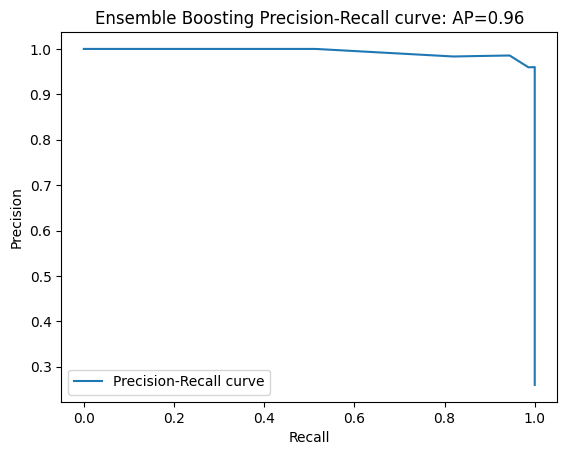

In [23]:
# Precision-Recall curve
precision_ensemble_boosting, recall_ensemble_boosting, _ = precision_recall_curve(Y_test, ensemble_model_boosting.decision_function(X_test))

plt.plot(recall_ensemble_boosting, precision_ensemble_boosting, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Boosting Precision-Recall curve: AP={0:0.2f}'.format(average_precision_ensemble_boosting))
plt.legend(loc="lower left")
plt.show()


In [24]:
# Calculate Mean Squared Error (MSE)
mse_ensemble_boosting = mean_squared_error(Y_test, Y_pred_ensemble_boosting)
print("Mean Squared Error (MSE) for Ensemble Boosting (Decision Tree):", mse_ensemble_boosting)

# Calculate Mean Absolute Error (MAE)
mae_ensemble_boosting = mean_absolute_error(Y_test, Y_pred_ensemble_boosting)
print("Mean Absolute Error (MAE) for Ensemble Boosting (Decision Tree):", mae_ensemble_boosting)

# Calculate Area Under the ROC Curve (AUC)
auc_ensemble_boosting = roc_auc_score(Y_test, Y_pred_ensemble_boosting)
print("Area Under the ROC Curve (AUC) for Ensemble Boosting (Decision Tree):", auc_ensemble_boosting)


Mean Squared Error (MSE) for Ensemble Boosting (Decision Tree): 0.010830324909747292
Mean Absolute Error (MAE) for Ensemble Boosting (Decision Tree): 0.010830324909747292
Area Under the ROC Curve (AUC) for Ensemble Boosting (Decision Tree): 0.9926829268292683


In [25]:
# Individual models evaluation
model_scores = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score'])


In [26]:
# KNN alone
train_score_knn_classifier = knn_classifier.score(X_train, Y_train) * 100
test_score_knn_classifier = knn_classifier.score(X_test, Y_test) * 100
model_scores = model_scores.append({'Model': 'KNN', 'Train Score': train_score_knn_classifier, 'Test Score': test_score_knn_classifier},
                                   ignore_index=True)


<ipython-input-26-094c043ee24e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'KNN', 'Train Score': train_score_knn_classifier, 'Test Score': test_score_knn_classifier},


In [27]:
# Ensemble Bagging (KNN)
train_score_ensemble_bagging = ensemble_model_bagging.score(X_train, Y_train) * 100
test_score_ensemble_bagging = ensemble_model_bagging.score(X_test, Y_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Bagging', 'Train Score': train_score_ensemble_bagging,
                                    'Test Score': test_score_ensemble_bagging}, ignore_index=True)


<ipython-input-27-746dc649b21e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Ensemble Bagging', 'Train Score': train_score_ensemble_bagging,


In [28]:
# Ensemble Boosting(Decision Tree)
train_score_ensemble_boosting = ensemble_model_boosting.score(X_train, Y_train) * 100
test_score_ensemble_boosting = ensemble_model_boosting.score(X_test, Y_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Boosting', 'Train Score': train_score_ensemble_boosting,
                                    'Test Score': test_score_ensemble_boosting}, ignore_index=True)

print("\nModel Scores:")
print(model_scores)



Model Scores:
               Model  Train Score  Test Score
0                KNN    97.058824   93.140794
1   Ensemble Bagging    97.213622   93.862816
2  Ensemble Boosting    97.987616   98.916968


<ipython-input-28-13f791a2b370>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Ensemble Boosting', 'Train Score': train_score_ensemble_boosting,


In [29]:
import pandas as pd
from sklearn.metrics import classification_report

# Create a dictionary of evaluation metrics
metrics = {
    'Model': ['KNN', 'Ensemble Bagging', 'Ensemble Boosting'],
    'Accuracy': [accuracy_knn, accuracy_ensemble_bagging, accuracy_ensemble_boosting]
}

# Parse the classification report for KNN model
report_knn = classification_report(Y_test, Y_pred_knn, output_dict=True)
# metrics['Precision'] = [report_knn['1']['precision'], classification_report_ensemble_bagging['1']['precision'], classification_report_ensemble_boosting['1']['precision']]
# metrics['Recall'] = [report_knn['1']['recall'], classification_report_ensemble_bagging['1']['recall'], classification_report_ensemble_boosting['1']['recall']]
# metrics['F1-score'] = [report_knn['1']['f1-score'], classification_report_ensemble_bagging['1']['f1-score'], classification_report_ensemble_boosting['1']['f1-score']]
# metrics['Support'] = [report_knn['1']['support'], classification_report_ensemble_bagging['1']['support'], classification_report_ensemble_boosting['1']['support']]

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print("Evaluation Metrics:")
print(metrics_df)


Evaluation Metrics:
               Model  Accuracy
0                KNN  0.931408
1   Ensemble Bagging  0.938628
2  Ensemble Boosting  0.989170


In [32]:
from tabulate import tabulate

# Create a DataFrame to store the evaluation metrics
metrics_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'Average Precision', 'MSE', 'MAE', 'AUC'])

# Add KNN model metrics to the table
precision_knn, recall_knn, f1_score_knn, _ = classification_report(Y_test, Y_pred_knn, output_dict=True)['1'].values()

metrics_table = metrics_table.append({
    'Model': 'KNN',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_score_knn,
    'Specificity': specificity_knn,
    'Average Precision': average_precision_knn,
    'MSE': mse_knn,
    'MAE': mae_knn,
    'AUC': auc_knn
}, ignore_index=True)

# Add ensemble bagging model metrics to the table
precision_ensemble_bagging, recall_ensemble_bagging, f1_score_ensemble_bagging, _ = classification_report(Y_test, Y_pred_ensemble_bagging, output_dict=True)['1'].values()

metrics_table = metrics_table.append({
    'Model': 'Ensemble Bagging',
    'Accuracy': accuracy_ensemble_bagging,
    'Precision': precision_ensemble_bagging,
    'Recall': recall_ensemble_bagging,
    'F1 Score': f1_score_ensemble_bagging,
    'Specificity': specificity_ensemble_bagging,
    'Average Precision': average_precision_ensemble_bagging,
    'MSE': mse_ensemble_bagging,
    'MAE': mae_ensemble_bagging,
    'AUC': auc_ensemble_bagging
}, ignore_index=True)

# Add ensemble boosting model metrics to the table
precision_ensemble_boosting, recall_ensemble_boosting, f1_score_ensemble_boosting, _ = classification_report(Y_test, Y_pred_ensemble_boosting, output_dict=True)['1'].values()

metrics_table = metrics_table.append({
    'Model': 'Ensemble Boosting',
    'Accuracy': accuracy_ensemble_boosting,
    'Precision': precision_ensemble_boosting,
    'Recall': recall_ensemble_boosting,
    'F1 Score': f1_score_ensemble_boosting,
    'Specificity': specificity_ensemble_boosting,
    'Average Precision': average_precision_ensemble_boosting,
    'MSE': mse_ensemble_boosting,
    'MAE': mae_ensemble_boosting,
    'AUC': auc_ensemble_boosting
}, ignore_index=True)

# Format the table using tabulate
table = tabulate(metrics_table, headers='keys', tablefmt='presto')

# Print the formatted table
print(table)


    | Model             |   Accuracy |   Precision |   Recall |   F1 Score |   Specificity |   Average Precision |       MSE |       MAE |      AUC
----+-------------------+------------+-------------+----------+------------+---------------+---------------------+-----------+-----------+----------
  0 | KNN               |   0.931408 |    0.797753 | 0.986111 |   0.881988 |      0.912195 |            0.790283 | 0.0685921 | 0.0685921 | 0.949153
  1 | Ensemble Bagging  |   0.938628 |    0.816092 | 0.986111 |   0.893082 |      0.921951 |            0.808367 | 0.0613718 | 0.0613718 | 0.954031
  2 | Ensemble Boosting |   0.98917  |    0.96     | 1        |   0.979592 |      0.985366 |            0.96     | 0.0108303 | 0.0108303 | 0.992683


<ipython-input-32-059ca5fb223a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({
<ipython-input-32-059ca5fb223a>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({
<ipython-input-32-059ca5fb223a>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_table = metrics_table.append({


## Features selection

In [ ]:
# LinearSVC and Feature Selection
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False, random_state=9).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
selected_features = list(X.columns[model.get_support(indices=True)])
X1 = data[selected_features]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.3, random_state=9)


## Training model

In [ ]:
# Train KNN model
knn_classifier.fit(X1_train, Y1_train)

# Train ensemble bagging model
ensemble_model_bagging.fit(X1_train, Y1_train)

# Train ensemble boosting model
ensemble_model_boosting.fit(X1_train, Y1_train)


## Classification

In [ ]:
# Predict using knn model
Y1_pred_knn = knn_classifier.predict(X1_test)
accuracy_knn = accuracy_score(Y1_test, Y1_pred_knn)
confusion_matrix_knn = confusion_matrix(Y1_test, Y1_pred_knn)
classification_report_knn = classification_report(Y1_test, Y1_pred_knn)


In [ ]:
# Evaluate knn model
print("knn Classification Report:")
print(classification_report_knn)
print("knn Accuracy:", accuracy_knn)
print("knn Confusion Matrix:")
print(confusion_matrix_knn)


In [ ]:
# Average precision-recall score
average_precision = average_precision_score(Y1_test, Y1_pred_knn)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


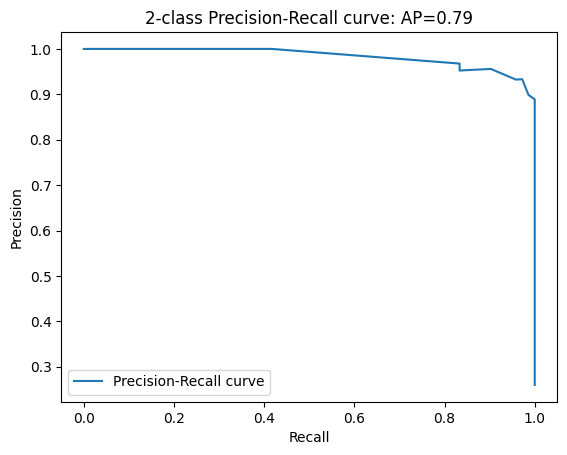

In [ ]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y1_test, ensemble_model_boosting.predict_proba(X1_test)[:, 1])

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Predict using ensemble bagging model
Y1_pred_ensemble_bagging = ensemble_model_bagging.predict(X1_test)
accuracy_ensemble_bagging = accuracy_score(Y1_test, Y1_pred_ensemble_bagging)
confusion_matrix_ensemble_bagging = confusion_matrix(Y1_test, Y1_pred_ensemble_bagging)
classification_report_ensemble_bagging = classification_report(Y1_test, Y1_pred_ensemble_bagging)


In [ ]:
# Evaluate ensemble bagging model
print("Ensemble Bagging Classification Report:")
print(classification_report_ensemble_bagging)
print("Ensemble Bagging Accuracy:", accuracy_ensemble_bagging)
print("Ensemble Bagging Confusion Matrix:")
print(confusion_matrix_ensemble_bagging)


Ensemble Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       205
           1       0.79      0.99      0.88        72

    accuracy                           0.93       277
   macro avg       0.89      0.95      0.91       277
weighted avg       0.94      0.93      0.93       277

Ensemble Bagging Accuracy: 0.927797833935018
Ensemble Bagging Confusion Matrix:
[[186  19]
 [  1  71]]


In [ ]:
# Average precision-recall score
average_precision = average_precision_score(Y1_test, Y1_pred_ensemble_bagging)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.78


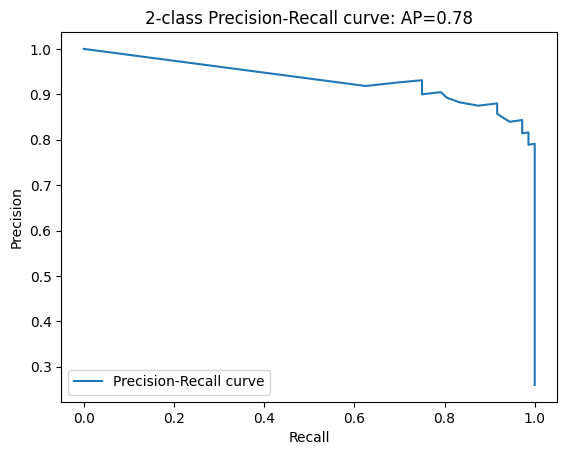

In [ ]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y1_test, ensemble_model_bagging.predict_proba(X1_test)[:, 1])

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Predict using ensemble boosting model
Y1_pred_ensemble_boosting = ensemble_model_boosting.predict(X1_test)
accuracy_ensemble_boosting = accuracy_score(Y1_test, Y1_pred_ensemble_boosting)
confusion_matrix_ensemble_boosting = confusion_matrix(Y1_test, Y1_pred_ensemble_boosting)
classification_report_ensemble_boosting = classification_report(Y1_test, Y1_pred_ensemble_boosting)


In [ ]:
# Evaluate ensemble boosting model
print("Ensemble Boosting Classification Report:")
print(classification_report_ensemble_boosting)
print("Ensemble Boosting Accuracy:", accuracy_ensemble_boosting)
print("Ensemble Boosting Confusion Matrix:")
print(confusion_matrix_ensemble_boosting)


Ensemble Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       205
           1       0.89      1.00      0.94        72

    accuracy                           0.97       277
   macro avg       0.94      0.98      0.96       277
weighted avg       0.97      0.97      0.97       277

Ensemble Boosting Accuracy: 0.9675090252707581
Ensemble Boosting Confusion Matrix:
[[196   9]
 [  0  72]]


In [ ]:
# Average precision-recall score
average_precision = average_precision_score(Y1_test, Y1_pred_ensemble_boosting)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.89


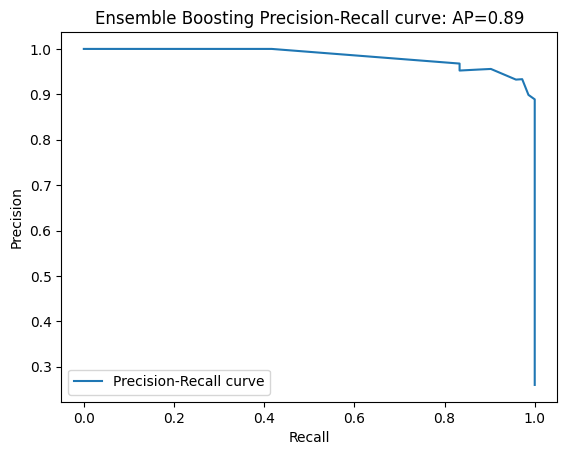

In [ ]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y1_test, ensemble_model_boosting.decision_function(X1_test))

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Boosting Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Individual models evaluation
model_scores = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score'])


In [ ]:
# KNN alone
train_score_knn_classifier = knn_classifier.score(X1_train, Y1_train) * 100
test_score_knn_classifier = knn_classifier.score(X1_test, Y1_test) * 100
model_scores = model_scores.append({'Model': 'KNN', 'Train Score': train_score_knn_classifier, 'Test Score': test_score_knn_classifier},
                                   ignore_index=True)


<ipython-input-46-ee199245a704>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'KNN', 'Train Score': train_score_knn_classifier, 'Test Score': test_score_knn_classifier},


In [ ]:
# Ensemble Bagging (KNN)
train_score_ensemble_bagging = ensemble_model_bagging.score(X1_train, Y1_train) * 100
test_score_ensemble_bagging = ensemble_model_bagging.score(X1_test, Y1_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Bagging', 'Train Score': train_score_ensemble_bagging,
                                    'Test Score': test_score_ensemble_bagging}, ignore_index=True)


<ipython-input-47-9618acaf72a1>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Ensemble Bagging', 'Train Score': train_score_ensemble_bagging,


In [ ]:
# Ensemble Boosting(Decision Tree)
train_score_ensemble_boosting = ensemble_model_boosting.score(X1_train, Y1_train) * 100
test_score_ensemble_boosting = ensemble_model_boosting.score(X1_test, Y1_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Boosting', 'Train Score': train_score_ensemble_boosting,
                                    'Test Score': test_score_ensemble_boosting}, ignore_index=True)

print("\nModel Scores:")
print(model_scores)



Model Scores:
               Model  Train Score  Test Score
0                KNN    96.904025   93.140794
1   Ensemble Bagging    96.749226   92.779783
2  Ensemble Boosting    95.975232   96.750903


<ipython-input-48-ff581d3357c6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Ensemble Boosting', 'Train Score': train_score_ensemble_boosting,


## Features selection with PCA

In [ ]:
# LinearSVC and Feature Selection
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False, random_state=9).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
selected_features = list(X.columns[model.get_support(indices=True)])
X1 = data[selected_features]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.3, random_state=9)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Training model

In [ ]:
# Train KNN model
knn_classifier.fit(X1_train, Y1_train)

# Train ensemble bagging model
ensemble_model_bagging.fit(X1_train, Y1_train)

# Train ensemble boosting model
ensemble_model_boosting.fit(X1_train, Y1_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10, random_state=9)

## Classification

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      923 non-null    float64
 1   Tx      923 non-null    float64
 2   RR      923 non-null    float64
dtypes: float64(3)
memory usage: 21.8 KB


In [ ]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False,random_state=9).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


IndexError: ignored

In [ ]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Hujan_besok, Tn, Tx, RR')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [ ]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1, 5))) 
print(variance[30:70])

In [ ]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [ ]:
# Predict using knn model
Y1_pred_knn = knn_classifier.predict(X1_test)
accuracy_knn = accuracy_score(Y1_test, Y1_pred_knn)
confusion_matrix_knn = confusion_matrix(Y1_test, Y1_pred_knn)
classification_report_knn = classification_report(Y1_test, Y1_pred_knn)


In [ ]:
# Evaluate knn model
print("knn Classification Report:")
print(classification_report_knn)
print("knn Accuracy:", accuracy_knn)
print("knn Confusion Matrix:")
print(confusion_matrix_knn)


In [ ]:
# Average precision-recall score
average_precision = average_precision_score(Y1_test, Y1_pred_knn)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


In [ ]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y1_test, ensemble_model_boosting.predict_proba(X1_test)[:, 1])

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Predict using ensemble bagging model
Y1_pred_ensemble_bagging = ensemble_model_bagging.predict(X1_test)
accuracy_ensemble_bagging = accuracy_score(Y1_test, Y1_pred_ensemble_bagging)
confusion_matrix_ensemble_bagging = confusion_matrix(Y1_test, Y1_pred_ensemble_bagging)
classification_report_ensemble_bagging = classification_report(Y1_test, Y1_pred_ensemble_bagging)


In [ ]:
# Evaluate ensemble bagging model
print("Ensemble Bagging Classification Report:")
print(classification_report_ensemble_bagging)
print("Ensemble Bagging Accuracy:", accuracy_ensemble_bagging)
print("Ensemble Bagging Confusion Matrix:")
print(confusion_matrix_ensemble_bagging)


In [ ]:
# Average precision-recall score
average_precision = average_precision_score(Y1_test, Y1_pred_ensemble_bagging)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


In [ ]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y1_test, ensemble_model_bagging.predict_proba(X1_test)[:, 1])

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Predict using ensemble boosting model
Y1_pred_ensemble_boosting = ensemble_model_boosting.predict(X1_test)
accuracy_ensemble_boosting = accuracy_score(Y1_test, Y1_pred_ensemble_boosting)
confusion_matrix_ensemble_boosting = confusion_matrix(Y1_test, Y1_pred_ensemble_boosting)
classification_report_ensemble_boosting = classification_report(Y1_test, Y1_pred_ensemble_boosting)


In [ ]:
# Evaluate ensemble boosting model
print("Ensemble Boosting Classification Report:")
print(classification_report_ensemble_boosting)
print("Ensemble Boosting Accuracy:", accuracy_ensemble_boosting)
print("Ensemble Boosting Confusion Matrix:")
print(confusion_matrix_ensemble_boosting)


In [ ]:
# Average precision-recall score
average_precision = average_precision_score(Y1_test, Y1_pred_ensemble_boosting)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


In [ ]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y1_test, ensemble_model_boosting.decision_function(X1_test))

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Boosting Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Individual models evaluation
model_scores = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score'])


In [ ]:
# KNN alone
train_score_knn_classifier = knn_classifier.score(X1_train, Y1_train) * 100
test_score_knn_classifier = knn_classifier.score(X1_test, Y1_test) * 100
model_scores = model_scores.append({'Model': 'KNN', 'Train Score': train_score_knn_classifier, 'Test Score': test_score_knn_classifier},
                                   ignore_index=True)


In [ ]:
# Ensemble Bagging (KNN)
train_score_ensemble_bagging = ensemble_model_bagging.score(X1_train, Y1_train) * 100
test_score_ensemble_bagging = ensemble_model_bagging.score(X1_test, Y1_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Bagging', 'Train Score': train_score_ensemble_bagging,
                                    'Test Score': test_score_ensemble_bagging}, ignore_index=True)


In [ ]:
# Ensemble Boosting(Decision Tree)
train_score_ensemble_boosting = ensemble_model_boosting.score(X1_train, Y1_train) * 100
test_score_ensemble_boosting = ensemble_model_boosting.score(X1_test, Y1_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Boosting', 'Train Score': train_score_ensemble_boosting,
                                    'Test Score': test_score_ensemble_boosting}, ignore_index=True)

print("\nModel Scores:")
print(model_scores)
